# Intro
In this project I have downloaded a dataset from the Kaggle website. I am attempting to build a fraud detection model.

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Import Packages

In [42]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

# Import Data

In [43]:
data = pd.read_csv(r'C:/Users/drodr/Documents/Data Science/Datasets/creditcardfraud/creditcard.csv')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Looks like some easy pre-processed data to work with. All numbers, all non-null. Sweet!

In [45]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Data Analysis

### Histogram

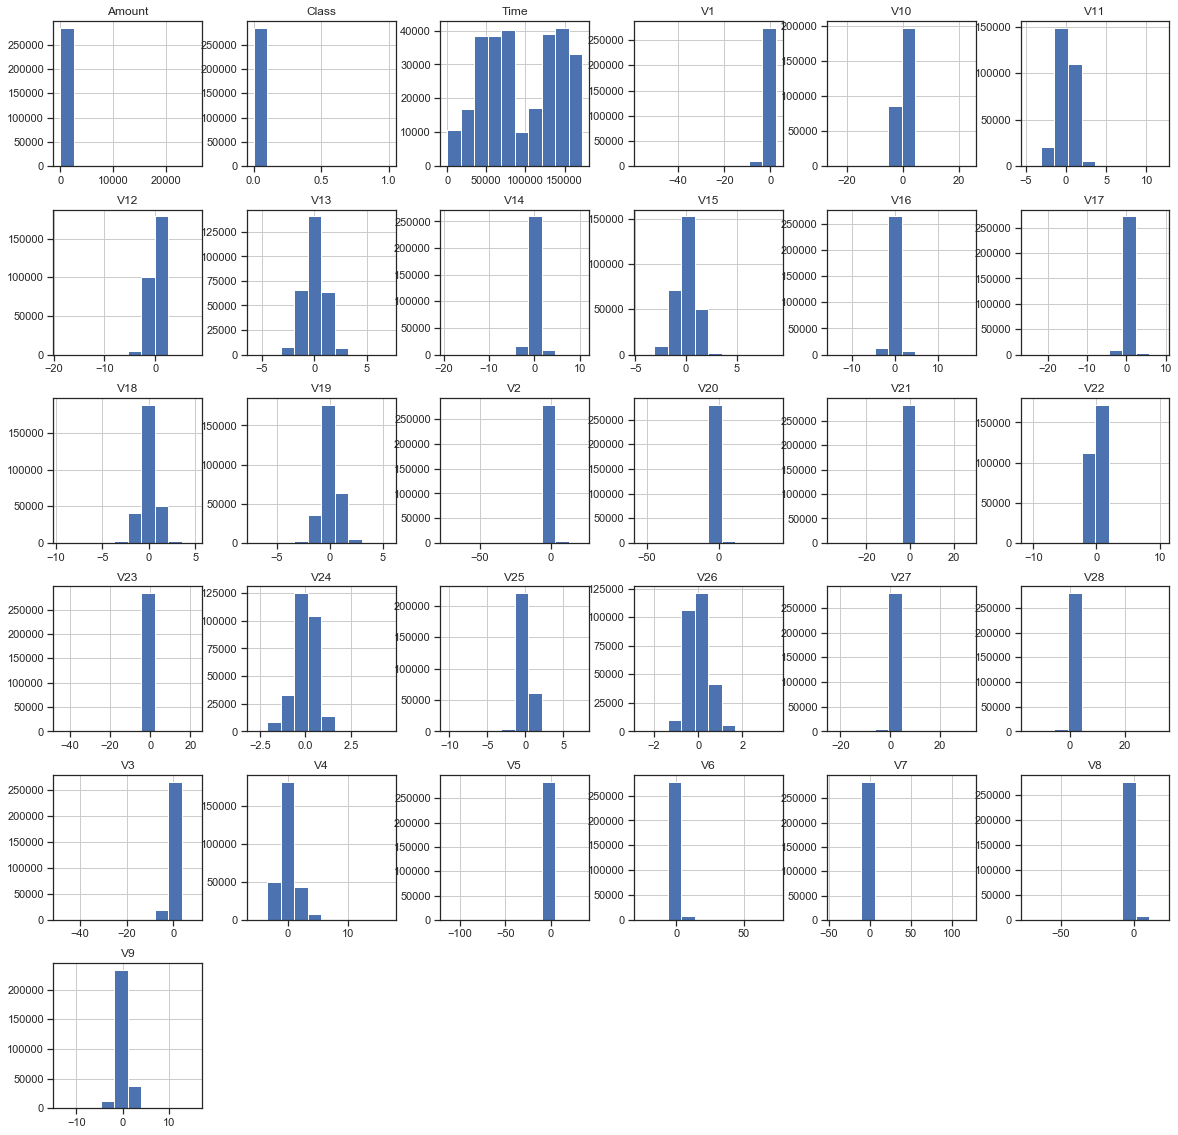

In [46]:
data.hist(figsize = (20, 20))
plt.show()

Wow - this data is extremely inbalanced. See how we are trying to predict class but the distribution is highly skewed? We need to find a way to artificially balance this dataset otherwise I don't know if our model is going to be able to accurately classify, especially since class is not an outlier but what we are trying to predict...

# Organize the Data

## Create X and y

In [47]:
# y will be our target variable
# X will be our input variables

y = data['Class']
X = data.drop('Class', axis=1)

## Create Test / Train Split

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

# Logistic Regression

This is a traditional supervised classification problem. Taking a bunch of input variables and we are trying to determine which class it belongs to: Fraud or not Fraud. Let's use our handy cheat sheet to take a look at a couple of models. (https://blogs.sas.com/content/subconsciousmusings/2017/04/12/machine-learning-algorithm-use/)

We are going to use logistic regression but we need a trick to use because the dataset is so imbalanced. To do this we can try undersampling the negatives or oversampling the positives to try to force-balance it. To accomodate for this we are going to try a little trick called "balancing" using RandomUnderSampler to undersample the negative class and (https://towardsdatascience.com/outlier-detection-with-one-class-svms-5403a1a1878c) and ADASYN to oversample the positive class




In [49]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import ADASYN 
ada = ADASYN() 
X_resampled, y_resampled = ada.fit_sample(X_train, y_train) 
clf = LogisticRegression() 
clf.fit(X_resampled, y_resampled)

C:\Users\drodr\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Confusion matrix, without normalization
[[91787  2034]
 [   14   152]]
Normalized confusion matrix
[[0.97832042 0.02167958]
 [0.08433735 0.91566265]]


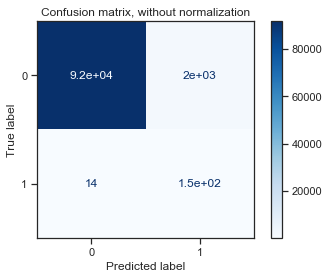

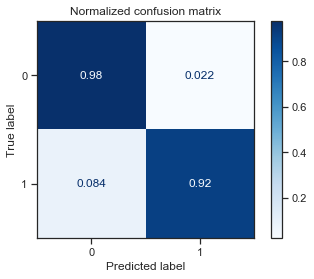

In [50]:
from sklearn.metrics import plot_confusion_matrix
import numpy as np
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Our detection model is pretty solid! 92% accuracy with only 2% false positive rate. We have successfully built a model using ADASYN to oversample and "beef up" the positive hits because the model isn't balanced, this way we had a good understanding of what exactly consitutes a false positive.

## Summary of Resources used

Dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud

Suggestions on Machine Learning Algorithms: https://blogs.sas.com/content/subconsciousmusings/2017/04/12/machine-learning-algorithm-use/

How to balance an imbalanced dataset for classification:https://towardsdatascience.com/outlier-detection-with-one-class-svms-5403a1a1878c


